In [17]:
# Install the apyori library
!pip install apyori

In [20]:
# Import necessary libraries for data analysis and Apriori algorithm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

In [21]:
# Load the dataset and convert it into a list of transactions
dataset = pd.read_csv("Netflix_Movie_Recommendation.csv", header = None)
transactions = []

transactions = [list(map(str, row)) for row in dataset.values]

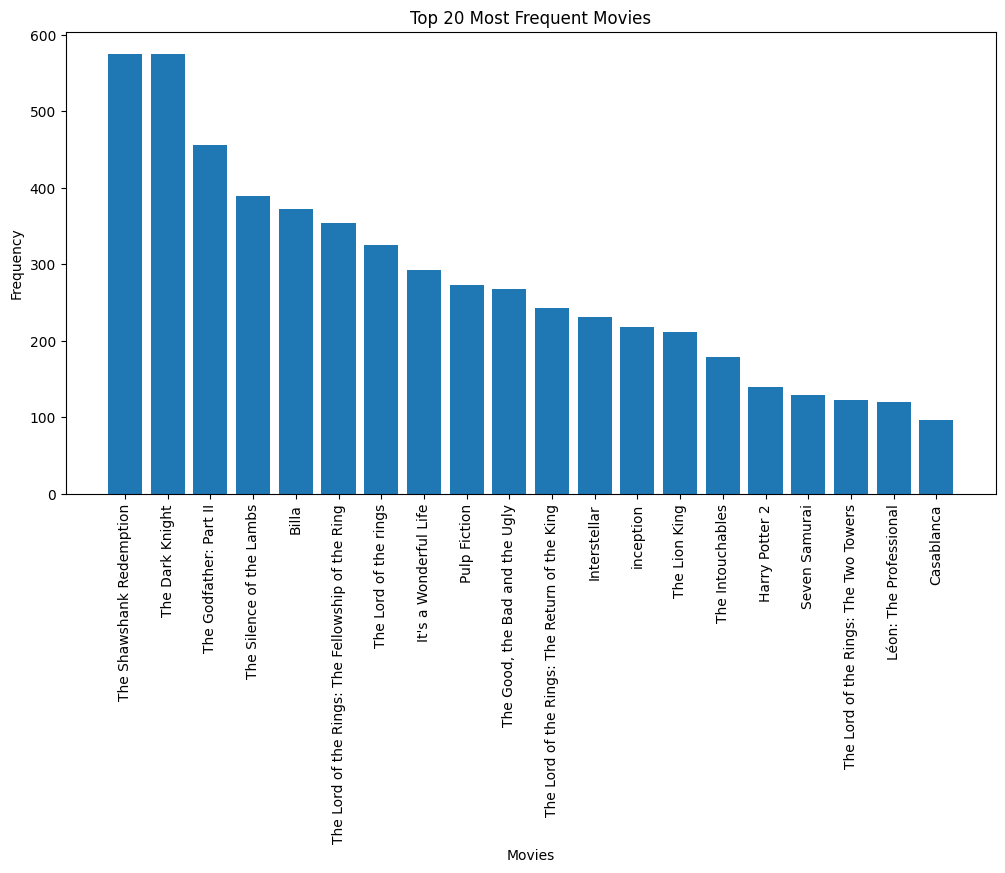

In [30]:
movie_counts = dataset[0].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(movie_counts.index[:20], movie_counts.values[:20])
plt.xticks(rotation=90)
plt.xlabel("Movies")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Movies")
plt.show()

In [22]:
print(transactions)

[['The Lord of the rings', 'Cinema Paradiso', 'Se7en', 'Avengers: Infinity War', 'The Shining', 'High and Low ', 'Terminator 2: Judgment Day', 'Toy Story', 'City of God', 'Witness for the Prosecution', '12 Angry Men', 'Whiplash', 'Black Panther', 'Hamilton', 'The Dark Knight', 'Once Upon a Time in the West', 'The Great Dictator', 'Back to the Future', 'Aliens', 'Comedy nights with Kapil'], ['The Shawshank Redemption', 'Fight Club', 'Pulp Fiction', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['The Godfather', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['The Godfather: Part II', 'Se7en', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['The Dark Knight', 'The Intouchables', "One Flew Over the Cuckoo's Nest", 'whole wheat Star Wars: Episode V - Th

In [23]:
# Apply the Apriori algorithm to find frequent itemsets and association rules
movie_intelligence = apriori(transactions = transactions,
                                 min_support = 0.002,
                                 min_confidence = 0.2,
                                 min_lift = 3,
                                 min_length = 2,
                                 max_length = 2)

In [24]:
# Get the results of the Apriori algorithm
results = list(movie_intelligence)
results

[RelationRecord(items=frozenset({'The Pianist', '3 Idiots'}), support=0.0021430484864720066, ordered_statistics=[OrderedStatistic(items_base=frozenset({'3 Idiots'}), items_add=frozenset({'The Pianist'}), confidence=0.3076923076923077, lift=3.2264477095937774)]),
 RelationRecord(items=frozenset({'American History X', 'The Good, the Bad and the Ugly'}), support=0.002009107956067506, ordered_statistics=[OrderedStatistic(items_base=frozenset({'American History X'}), items_add=frozenset({'The Good, the Bad and the Ugly'}), confidence=0.2586206896551724, lift=3.2181034482758615)]),
 RelationRecord(items=frozenset({'Captain America', 'Black Panther'}), support=0.00334851326011251, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Captain America'}), items_add=frozenset({'Black Panther'}), confidence=0.24509803921568626, lift=5.140174047146949)]),
 RelationRecord(items=frozenset({'Game of thrones', 'Comedy nights with Kapil'}), support=0.0032145727297080095, ordered_statistics=[Order

In [26]:
# Define a function to extract relevant information from the results
def inspect(results):
  movie1 = [tuple(result[2][0][0]) for result in results]
  movie2 = [tuple(result[2][0][1]) for result in results]
  supports = [result[1] for result in results]
  confidences = [result[2][0][2] for result in results]
  lifts = [result[2][0][3] for result in results]
  return list(zip(movie1, movie2, supports, confidences, lifts))

# Create a Pandas DataFrame to store the results
DataFrame_intelligence = pd.DataFrame(inspect(results), columns = ['Movie1', 'Movie2', 'Support', 'Confidence', 'Lift'])

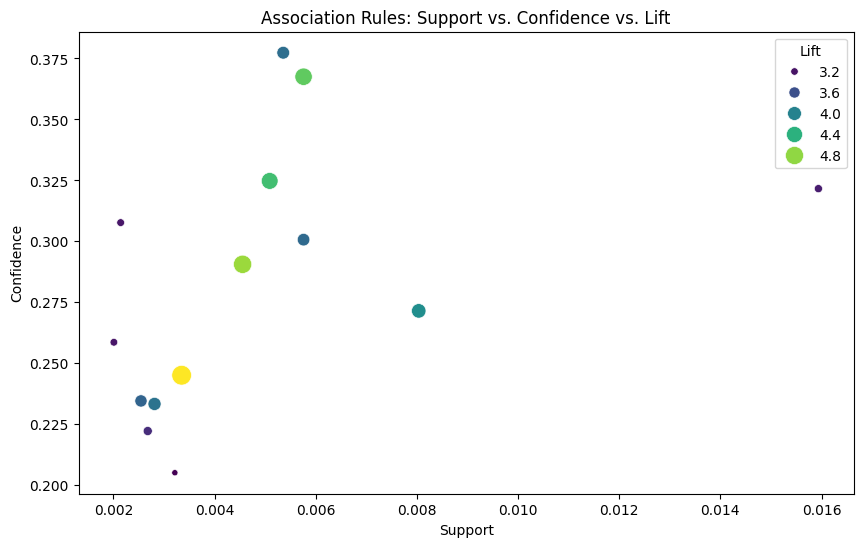

In [31]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x="Support", y="Confidence", size="Lift", data=DataFrame_intelligence, hue="Lift", palette="viridis", sizes=(20, 200))
plt.title("Association Rules: Support vs. Confidence vs. Lift")
plt.show()

In [27]:
DataFrame_intelligence

,Movie1,Movie2,Support,Confidence,Lift
0,"(3 Idiots,)","(The Pianist,)",0.002143,0.307692,3.226448
1,"(American History X,)","(The Good, the Bad and the Ugly,)",0.002009,0.258621,3.218103
2,"(Captain America,)","(Black Panther,)",0.003349,0.245098,5.140174
3,"(Game of thrones,)","(Comedy nights with Kapil,)",0.003215,0.205128,3.100176
4,"(Kanan Gill Comedy,)","(Comedy nights with Kapil,)",0.008036,0.271493,4.103175
5,"(extra dark The Silence of the Lambs,)","(Comedy nights with Kapil,)",0.002679,0.222222,3.358525
6,"(Game of thrones,)","(Prision Break,)",0.004554,0.290598,4.832086
7,"(Harry Potter 1,)","(Harry Potter 2,)",0.005759,0.367521,4.642833
8,"(Harry Potter 1,)","(The Lord of the rings,)",0.005090,0.324786,4.523983
9,"(crimes of grindelwald,)","(Harry Potter 2,)",0.005759,0.300699,3.798682


In [28]:
# Display the top 10 rules with the highest lift values
DataFrame_intelligence.nlargest(n = 10, columns = 'Lift')

,Movie1,Movie2,Support,Confidence,Lift
2,"(Captain America,)","(Black Panther,)",0.003349,0.245098,5.140174
6,"(Game of thrones,)","(Prision Break,)",0.004554,0.290598,4.832086
7,"(Harry Potter 1,)","(Harry Potter 2,)",0.005759,0.367521,4.642833
8,"(Harry Potter 1,)","(The Lord of the rings,)",0.005090,0.324786,4.523983
4,"(Kanan Gill Comedy,)","(Comedy nights with Kapil,)",0.008036,0.271493,4.103175
12,"(extra dark The Silence of the Lambs,)","(Prision Break,)",0.002813,0.233333,3.879881
13,"(The Wolf of Wall Street,)","(inception,)",0.005358,0.377358,3.827933
9,"(crimes of grindelwald,)","(Harry Potter 2,)",0.005759,0.300699,3.798682
10,"(Inglourious Basterds,)","(The Godfather: Part II,)",0.002545,0.234568,3.750073
5,"(extra dark The Silence of the Lambs,)","(Comedy nights with Kapil,)",0.002679,0.222222,3.358525


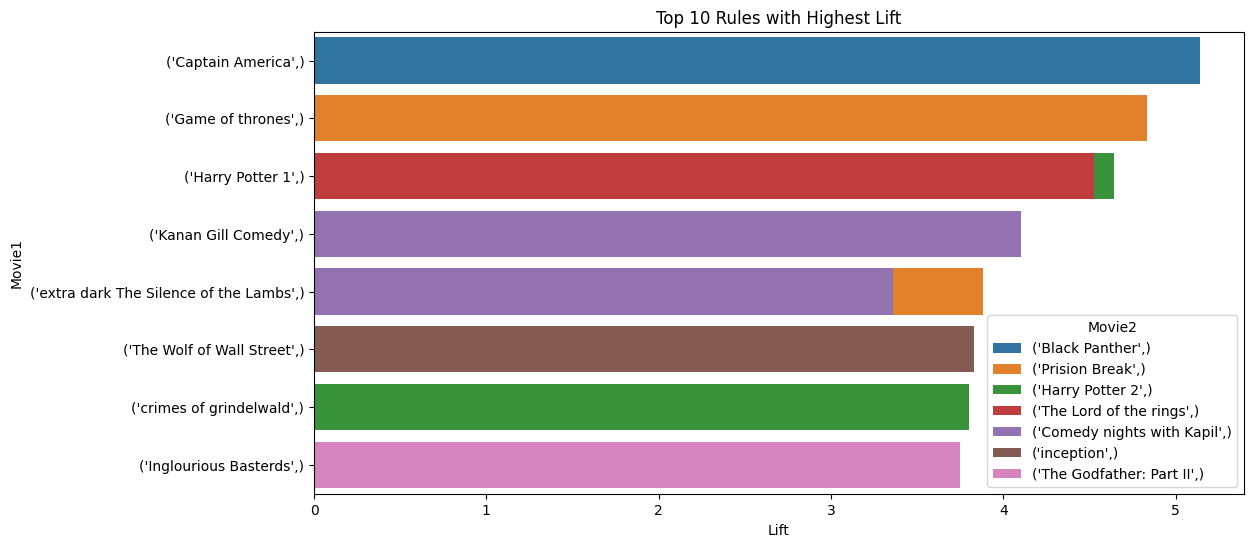

In [38]:
top_10_rules['Movie1'] = top_10_rules['Movie1'].astype(str)

plt.figure(figsize=(12, 6))
sns.barplot(x="Lift", y="Movie1", hue="Movie2", data=top_10_rules, dodge=False)
plt.title("Top 10 Rules with Highest Lift")
plt.xlabel("Lift")
plt.ylabel("Movie1")
plt.legend(title="Movie2")
plt.show()